In [35]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("../../data/wine_data.csv",usecols=[0,1,2],header=None)
df.columns = ['Class Label','Alcohol','Malic_Acid']

In [8]:
df

,Class Label,Alcohol,Malic_Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


### KDE plot
Kde plot is just like a histogram but smoother and better for continuous data

<Axes: xlabel='Alcohol', ylabel='Density'>

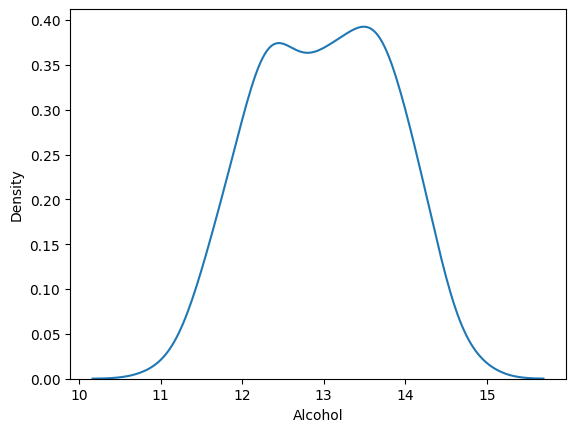

In [11]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic_Acid', ylabel='Density'>

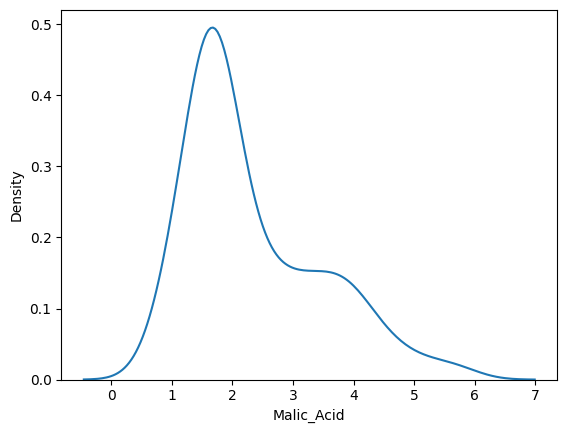

In [13]:
sns.kdeplot(df['Malic_Acid'])

<Axes: xlabel='Alcohol', ylabel='Malic_Acid'>

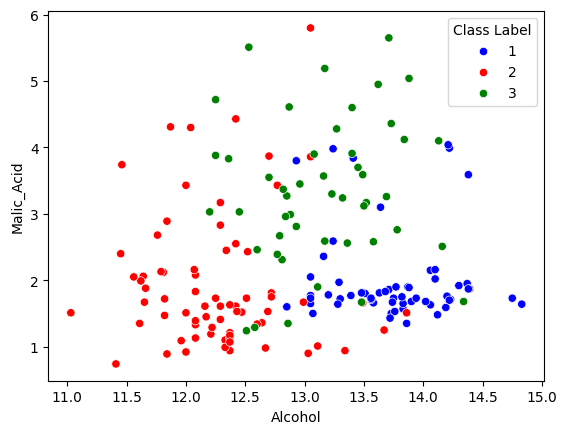

In [14]:
sns.scatterplot(x=df['Alcohol'],y=df['Malic_Acid'],hue=df['Class Label'],palette={1:'blue',2:'red',3:'green'})

In [16]:
from sklearn.model_selection import train_test_split

X = df.drop('Class Label',axis=1)
y = df['Class Label']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X.shape,X_train.shape,X_test.shape

((178, 2), (142, 2), (36, 2))

In [19]:
class MinMaxScaler:
    def __init__(self):
        self.min_ = None
        self.max_ = None

    def fit(self,X):
        '''Method for capturing the minimum and maximum value from the given 1D dataframe'''
        X = np.array(X)
        self.min_ = X.min()
        self.max_ = X.max()
        return self

    def transform(self,X):
        '''Transforming the given dataframe using the learned min and max value'''
        X = np.array(X)
        return ((X - self.min_)/(self.max_ - self.min_))

In [26]:
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [31]:
print(X_train.describe())
print(X_train_scaled.describe())

          Alcohol  Malic_Acid
count  142.000000  142.000000
mean    12.979085    2.373521
std      0.820116    1.143934
min     11.030000    0.890000
25%     12.332500    1.615000
50%     13.010000    1.875000
75%     13.677500    3.135000
max     14.830000    5.800000
          Alcohol  Malic_Acid
count  142.000000  142.000000
mean     0.867223    0.106422
std      0.058832    0.082061
min      0.727403    0.000000
25%      0.820839    0.052009
50%      0.869440    0.070660
75%      0.917324    0.161047
max      1.000000    0.352224


Text(0.5, 1.0, 'After normalization')

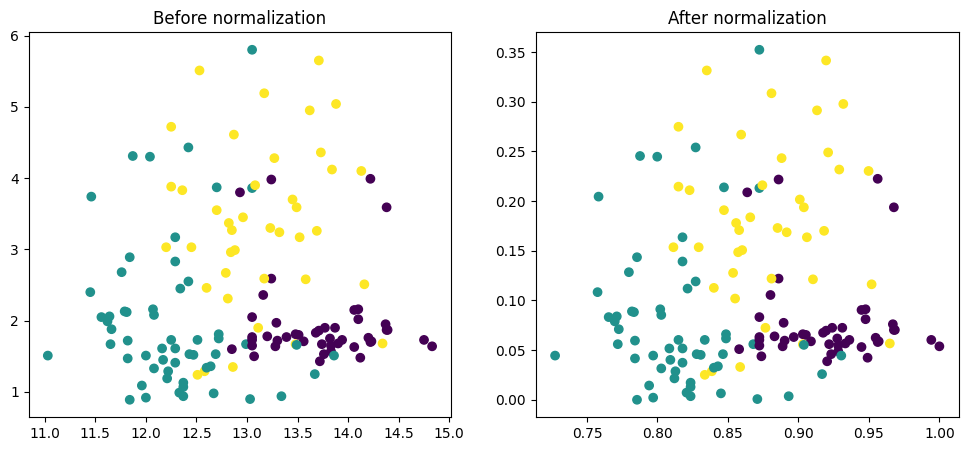

In [37]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['Alcohol'],X_train['Malic_Acid'],c=y_train)
ax1.set_title("Before normalization")
ax2.scatter(X_train_scaled['Alcohol'],X_train_scaled['Malic_Acid'],c=y_train)
ax2.set_title("After normalization")